In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)


In [2]:
input_file = '/projects/ps-yeolab4/jsxiang/sars_cov2/RepeatElements/read_distribution.csv'
rd = pd.read_csv(input_file)
rd.head()

,Type of reads,Number of reads,Fraction of reads,Exp_rep,Exp_order
0,GenomicReads,4874950,0.263717,eCLIP4_2.NSP1-1,0
1,RepFamilyReads,13610571,0.736283,eCLIP4_2.NSP1-1,0
2,GenomicReads,1815038,0.230043,eCLIP4_2.NSP1-2,1
3,RepFamilyReads,6074956,0.769957,eCLIP4_2.NSP1-2,1
4,GenomicReads,10810456,0.379631,eCLIP5_2.nsp2-2,2


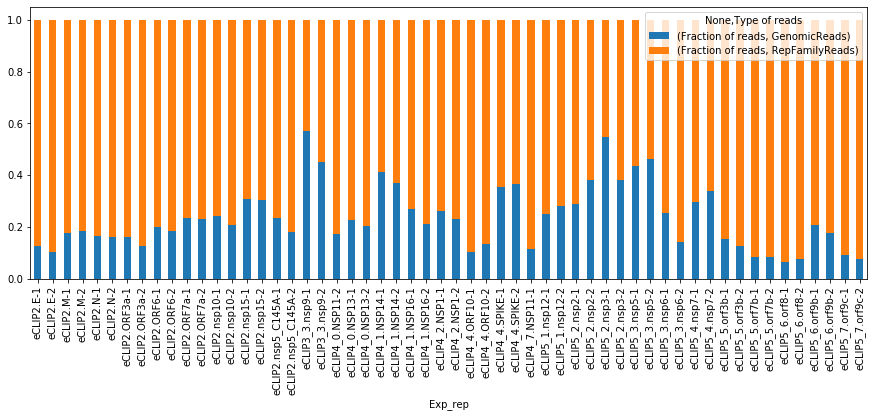

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
rx = rd[['Fraction of reads','Exp_rep','Type of reads']].pivot(columns='Type of reads',index='Exp_rep').fillna(0)
rx.plot(kind='bar', stacked=True, legend=True, ax=ax)

# What if we sort by some column?

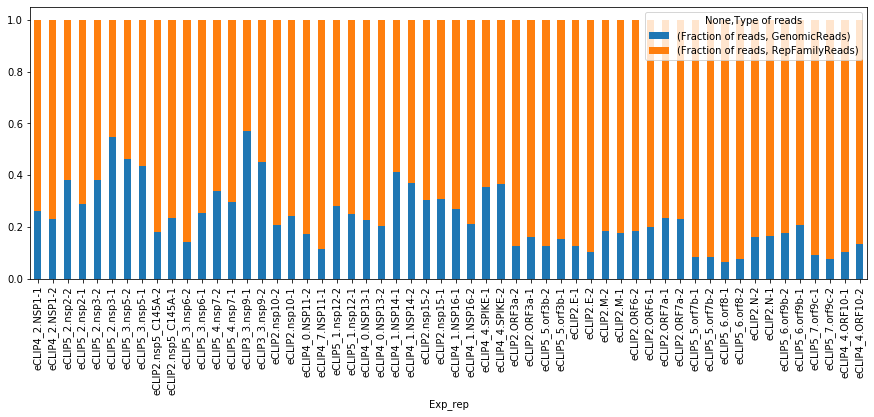

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
rx = rd[['Fraction of reads','Exp_rep','Type of reads','Exp_order']].pivot(columns='Type of reads',index='Exp_rep').fillna(0)
# 
rx.sort_values(by=[('Exp_order','GenomicReads')], inplace=True)
rx[['Fraction of reads']].plot(kind='bar', stacked=True, legend=True, ax=ax)

# What if we want to also sort the y-values?

In [5]:
input_file = '/projects/ps-yeolab4/jsxiang/sars_cov2/RepeatElements/Output_tables/top_30_family.csv'
rd = pd.read_csv(input_file)
rd.head()

,Family,Number of reads,Fraction of reads,Exp_rep,Exp_order,Family_order
0,RNA28S,8822430,0.477262,eCLIP4_2.NSP1-1,0,0
1,RNA28S,4287824,0.543451,eCLIP4_2.NSP1-2,1,0
2,RNA28S,9723053,0.341445,eCLIP5_2.nsp2-2,2,0
3,RNA28S,13548993,0.423129,eCLIP5_2.nsp2-1,3,0
4,RNA28S,9876577,0.360058,eCLIP5_2.nsp3-2,4,0


In [6]:
sorted_elements = list(rd[['Family','Family_order']].drop_duplicates().reset_index(drop=True)['Family'])
sorted_elements

['RNA28S',
 'RNA18S',
 'unique_distintron',
 'rRNA_extra',
 'unique_CDS',
 'unique_proxintron',
 'chrM',
 'RNA5S',
 'tRNA',
 'unique_3utr',
 'antisense_L1',
 'RNU1',
 'antisense_Alu',
 'unique_intergenic',
 'Alu',
 'unique_noncoding_exon',
 'antisense_L2',
 'unique_5utr',
 'L1',
 'unique_antisense_gencode',
 'Simple_repeat',
 'RN7SL',
 'RNA5-8S',
 'SNORD',
 'antisense_RN7SL',
 'unique_noncoding_distintron',
 'MIR',
 'L2',
 'antisense_MIR',
 'RNU2']

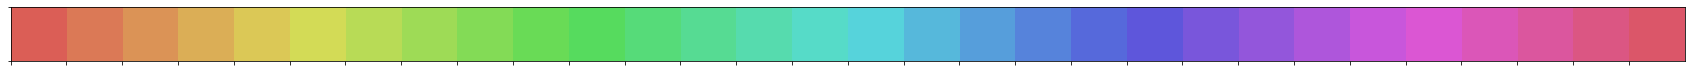

In [13]:
colors = sns.color_palette("hls", 30)
sns.palplot(colors)

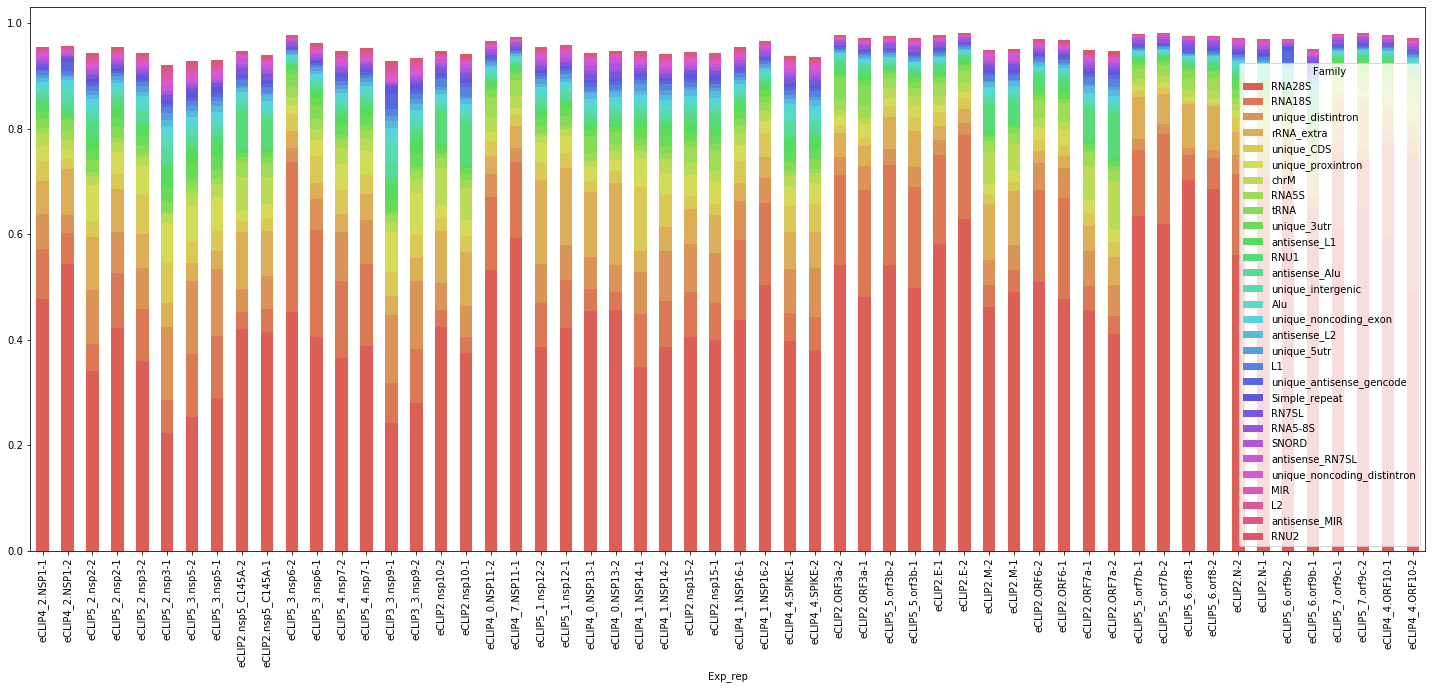

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
rd = rd[['Family', 'Fraction of reads', 'Exp_rep', 'Exp_order', 'Family_order']]
rx = rd[['Fraction of reads','Exp_rep','Family','Exp_order','Family_order']].pivot(columns='Family',index='Exp_rep').fillna(0)
rx.sort_values(by=[('Exp_order','Alu')], inplace=True)
rx = rx[['Fraction of reads']]
rx.columns = rx[['Fraction of reads']].columns.droplevel(0)
rx[sorted_elements].plot(kind='bar', stacked=True, legend=True, ax=ax, colors=colors)